# **WORKSHOP - 5: License Plate Detection using OpenCV and Haar Cascade Classifier**
# **Name : SANJEEV RAJ.S**
# **Reg No: 212223220096**

Displaying loaded images...


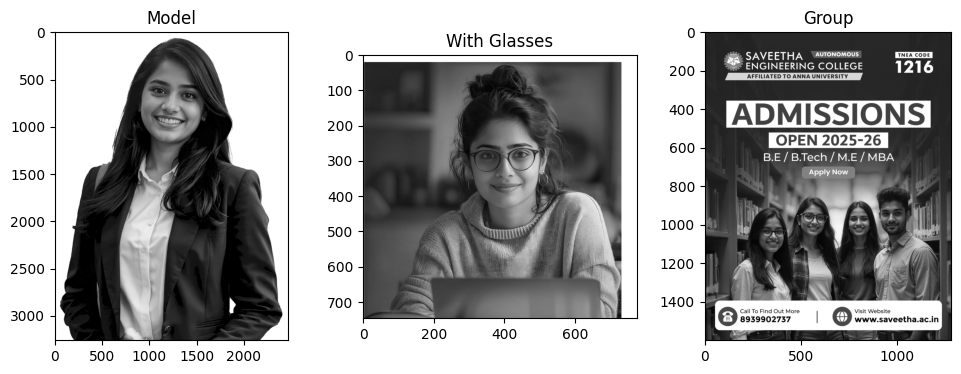

Applying Face Detection...


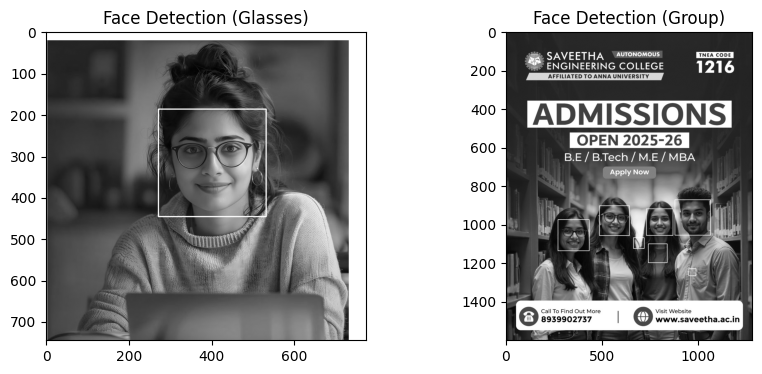

Applying Adjusted Face Detection...


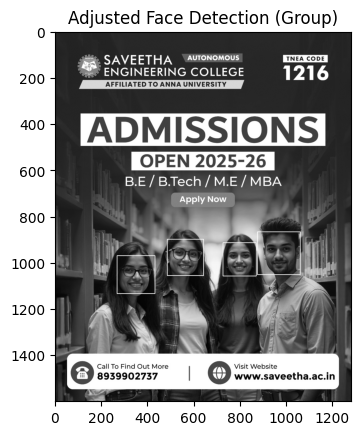

Applying Eye Detection...


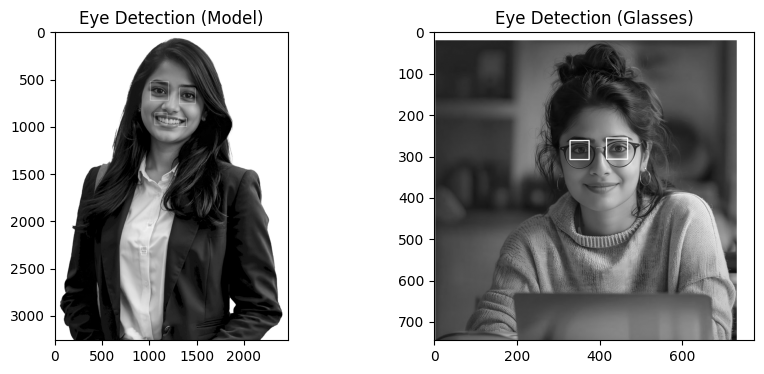


Starting Live Webcam Face Detection...


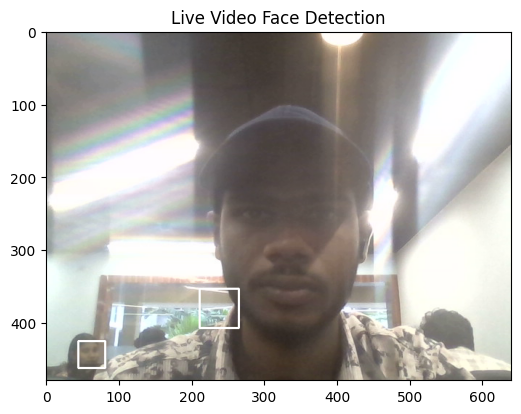

Webcam stream ended and resources released.


In [10]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# --- 1. Load Images and Cascades ---
# Load images (Assumes images are in the same directory)
# Note: These paths will only work if the images exist.
try:
    model = cv2.imread('image_01.png', 0)
    withglass = cv2.imread('image_02.png', 0)
    group = cv2.imread('image_03.jpeg', 0)
except Exception as e:
    print(f"Error loading images: {e}. Please ensure image files are present.")
    model = np.zeros((100, 100), dtype=np.uint8) # Create a dummy image to prevent crash
    withglass = np.zeros((100, 100), dtype=np.uint8)
    group = np.zeros((100, 100), dtype=np.uint8)


# Load Haar cascades with full paths
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Check if cascades loaded successfully
if face_cascade.empty():
    print("Error loading face cascade!")
if eye_cascade.empty():
    print("Error loading eye cascade!")

# --- 2. Display Loaded Images ---
print("Displaying loaded images...")
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(model, cmap='gray'), plt.title('Model')
plt.subplot(1, 3, 2), plt.imshow(withglass, cmap='gray'), plt.title('With Glasses')
plt.subplot(1, 3, 3), plt.imshow(group, cmap='gray'), plt.title('Group')
plt.show()

# --- 3. Detection Functions ---

# Face detection function
def detect_face(img):
    face_img = img.copy()
    # The detectMultiScale function detects objects of different sizes in the input image. 
    # The detected objects are returned as a list of rectangles.
    face_rects = face_cascade.detectMultiScale(face_img)
    for (x, y, w, h) in face_rects:
        # Draw a white rectangle around the detected face
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 2)
    return face_img

# Adjusted face detection function (for better results on group/complex photos)
def adj_detect_face(img):
    face_img = img.copy()
    # scaleFactor=1.2: Specifies how much the image size is reduced at each image scale
    # minNeighbors=5: Specifies how many neighbors each candidate rectangle should have to retain it
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 2)
    return face_img

# Eye detection function
def detect_eyes(img):
    face_img = img.copy()
    eyes = eye_cascade.detectMultiScale(face_img)
    for (x, y, w, h) in eyes:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 2)
    return face_img

# --- 4. Applying Face Detection ---
print("Applying Face Detection...")
result_glass = detect_face(withglass)
result_group = detect_face(group)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(result_glass, cmap='gray'), plt.title('Face Detection (Glasses)')
plt.subplot(1, 2, 2), plt.imshow(result_group, cmap='gray'), plt.title('Face Detection (Group)')
plt.show()

# --- 5. Applying Adjusted Face Detection ---
print("Applying Adjusted Face Detection...")
result_adj_group = adj_detect_face(group)
plt.imshow(result_adj_group, cmap='gray')
plt.title('Adjusted Face Detection (Group)')
plt.show()

# --- 6. Applying Eye Detection ---
print("Applying Eye Detection...")
result_eyes_model = detect_eyes(model)
result_eyes_glass = detect_eyes(withglass)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(result_eyes_model, cmap='gray'), plt.title('Eye Detection (Model)')
plt.subplot(1, 2, 2), plt.imshow(result_eyes_glass, cmap='gray'), plt.title('Eye Detection (Glasses)')
plt.show()

# --- 7. Corrected Live Webcam Detection ---
print("\nStarting Live Webcam Face Detection...")
# Initial setup
cap = cv2.VideoCapture(0)
plt.ion() # Turn on interactive mode for Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))

# Read the first frame to initialize the plot
ret, frame = cap.read()
im = None

if ret:
    frame = detect_face(frame)
    # Convert BGR (OpenCV default) to RGB (Matplotlib default)
    im = ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Live Video Face Detection')
    plt.show()

# Main video loop
MAX_FRAMES = 300 # Limit the video to 300 frames to prevent infinite running
frame_count = 0

while cap.isOpened() and frame_count < MAX_FRAMES:
    ret, frame = cap.read()

    if not ret:
        print("Failed to read frame from camera. Exiting.")
        break
        
    # Process the frame
    frame = detect_face(frame)
    
    # Update the Matplotlib plot
    im.set_data(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    # Pause to allow the plot to update (0.01s is good for a smooth video)
    plt.pause(0.01) 

    frame_count += 1

# Cleanup
cap.release()
plt.close(fig) # Close the figure for the video feed
print("Webcam stream ended and resources released.")